library("deMULTIplex")
library("ggplot2")

In [2]:
## deMULTIplexing ##
setwd("/project/ABKlab/Natalia/sc-RNA-seq/single_TLS_project")

# Table 120h_1

In [3]:
bartable_120h_1 <- readRDS("./files/bartable_120h_1.rds")

In [4]:
head(bartable_120h_1)
dim(bartable_120h_1)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24,nUMI,nUMI_total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGATACATG,3,3,5,90,1,3,2,6,3,4,⋯,46,7,0,3,1,5,8,11,240,295
AAACCCAAGATTGTGA,1,1,2,5,1,3,2,4,6,7,⋯,8,4,4,2,1,5,6,6,116,142
AAACCCAAGCAGCCTC,11,2,4,3,5,4,4,2,7,5,⋯,16,3,4,2,4,2,5,8,142,200
AAACCCAAGCCTATTG,2,3,6,4,0,3,6,4,8,7,⋯,14,8,6,8,7,16,3,913,1321,1575
AAACCCAAGCTGAAGC,39,28,3,2,3,762,2,4,6,4,⋯,6,5,1,3,3,3,2,2,920,1051
AAACCCAAGGTCCTGC,7,370,0,1,4,4,4,6,10,4,⋯,33,3,4,1,6,5,2,6,523,637


[1] 13924    26

In [5]:
x <- bartable_120h_1
initial_cell_number <- nrow(bartable_120h_1)

## demultiplexing: classification

In [6]:
## Visualize barcode space
bar.tsne <- barTSNE(x[,1:24]) # number of barcodes and not columns !!
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/120h_1_bc.check.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()


Loading required package: Rtsne



Performing PCA
Read the 13924 x 24 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 13924
Done in 8.35 seconds (sparsity = 0.010246)!
Learning embedding...
Iteration 50: error is 99.253784 (50 iterations in 3.04 seconds)
Iteration 100: error is 98.156471 (50 iterations in 4.68 seconds)
Iteration 150: error is 91.447368 (50 iterations in 2.52 seconds)
Iteration 200: error is 90.874287 (50 iterations in 2.30 seconds)
Iteration 250: error is 90.833690 (50 iterations in 2.31 seconds)
Iteration 300: error is 3.424807 (50 iterations in 2.25 seconds)
Iteration 350: error is 3.083364 (50 iterations in 2.18 seconds)
Iteration 400: error is 2.909352 (50 iterations in 2.15 seconds)
Iteration 450: error is 2.798407 (50 iterations in 2.14 seconds)
Iteration 500: error is 2.721856 (50 iterations in 2.12 seconds)
Iteration 550: error is 2.664410 (50 iterations in 2

png 
  2

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


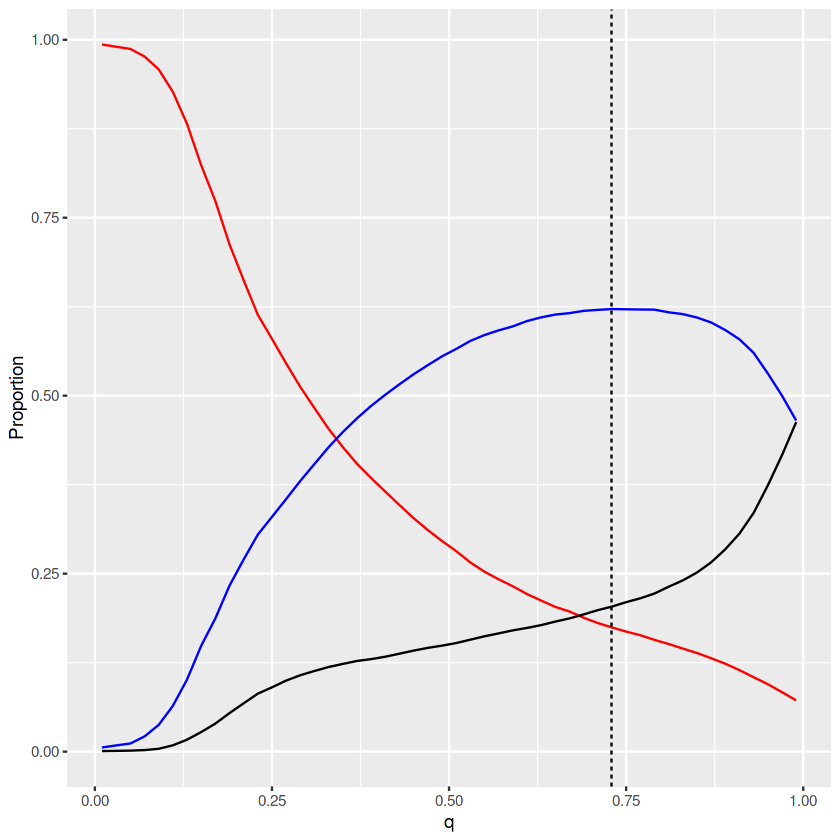

In [21]:
# Sample classification
## Round 1 -----------------------------------------------------------------------------------------------------
## Perform Quantile Sweep
bar.table.full <- x[,1:24]
good.bars <- paste("Bar",1:24,sep="")  # NOTE: In this hypothetical example, barcodes 91-96 were not detected
bar.table <- bar.table.full[, good.bars]  # Remove missing bars and summary columns
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

## Identify ideal inter-maxima quantile to set barcode-specific thresholds
threshold.results1 <- findThresh(call.list=bar.table_sweep.list)
ggplot(data=threshold.results1$res, aes(x=q, y=Proportion, color=Subset)) + geom_line() + theme(legend.position = "none") +
  geom_vline(xintercept=threshold.results1$extrema, lty=2) + scale_color_manual(values=c("red","black","blue"))

## Finalize round 1 classifications, remove negative cells
round1.calls <- classifyCells(bar.table, q=findQ(threshold.results1$res, threshold.results1$extrema))
neg.cells <- names(round1.calls)[which(round1.calls == "Negative")]
bar.table <- bar.table[-which(rownames(bar.table) %in% neg.cells), ]


In [22]:
table(round1.calls)
length(round1.calls)

round1.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     596      242      181      352      191      285      533      553 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     340      240      238      296      184      202      512      602 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     240      247      680      273      558      280      513      319 
 Doublet Negative 
    2429     2838 

[1] 13924

In [9]:
pdf("./outputs/MULTIseq/120h_1_bc.check_round1.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()

png 
  2

In [23]:
## Round 2 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results2 <- findThresh(call.list=bar.table_sweep.list)
round2.calls <- classifyCells(bar.table, q=findQ(threshold.results2$res, threshold.results2$extrema))
neg.cells <- c(neg.cells, names(round2.calls)[which(round2.calls == "Negative")])

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


In [24]:
length(neg.cells)

table(round2.calls)
length(round2.calls)

[1] 3000

round2.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     596      247      182      349      194      288      540      557 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     340      243      237      296      182      196      504      599 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     233      242      673      273      561      284      516      320 
 Doublet Negative 
    2272      162 

[1] 11086

In [25]:
## Round 3 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results3 <- findThresh(call.list=bar.table_sweep.list)
round3.calls <- classifyCells(bar.table, q=findQ(threshold.results3$res, threshold.results3$extrema))
neg.cells <- c(neg.cells, names(round3.calls)[which(round3.calls == "Negative")])

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


In [26]:
length(neg.cells)

table(round3.calls)
length(round3.calls)

[1] 3162

round3.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     596      247      182      349      194      288      540      557 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     340      243      237      296      182      196      504      599 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     233      242      673      273      561      284      516      320 
 Doublet Negative 
    2272      162 

[1] 11086

In [27]:
## Repeat until all no negative cells remain (usually 3 rounds)...
final.calls <- c(round3.calls, rep("Negative",length(neg.cells)))
names(final.calls) <- c(names(round3.calls),neg.cells)

In [29]:
head(bar.table)
dim(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar15,Bar16,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGATACATG,3,3,5,90,1,3,2,6,3,4,⋯,6,17,46,7,0,3,1,5,8,11
AAACCCAAGCCTATTG,2,3,6,4,0,3,6,4,8,7,⋯,14,15,14,8,6,8,7,16,3,913
AAACCCAAGCTGAAGC,39,28,3,2,3,762,2,4,6,4,⋯,7,16,6,5,1,3,3,3,2,2
AAACCCAAGGTCCTGC,7,370,0,1,4,4,4,6,10,4,⋯,11,22,33,3,4,1,6,5,2,6
AAACCCACAACGATTC,11,3,5,3,3,2,1,5,669,8,⋯,6,18,8,5,3,7,0,4,6,1
AAACCCACAGCACACC,8,1,10,5,1,273,7,5,7,7,⋯,3,20,17,3,7,3,2,7,15,3


[1] 11086    24

In [30]:
## Visualize barcode space
bar.tsne <- barTSNE(bar.table[,1:24]) 
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/120h_1_bc.check_round3.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()

Performing PCA
Read the 11086 x 24 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 11086
Done in 5.33 seconds (sparsity = 0.012586)!
Learning embedding...
Iteration 50: error is 96.595762 (50 iterations in 2.05 seconds)
Iteration 100: error is 90.399001 (50 iterations in 2.10 seconds)
Iteration 150: error is 83.851992 (50 iterations in 2.02 seconds)
Iteration 200: error is 82.586487 (50 iterations in 2.08 seconds)
Iteration 250: error is 82.235281 (50 iterations in 2.08 seconds)
Iteration 300: error is 3.050382 (50 iterations in 2.00 seconds)
Iteration 350: error is 2.709655 (50 iterations in 1.89 seconds)
Iteration 400: error is 2.538606 (50 iterations in 1.87 seconds)
Iteration 450: error is 2.432349 (50 iterations in 1.88 seconds)
Iteration 500: error is 2.358642 (50 iterations in 1.88 seconds)
Iteration 550: error is 2.304217 (50 iterations in 1

png 
  2

## Generation of barcode table

In [32]:
head(bar.table)
dim(bar.table)
bar.table$cell <- rownames(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar16,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24,cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
AAACCCAAGATACATG,3,3,5,90,1,3,2,6,3,4,⋯,17,46,7,0,3,1,5,8,11,AAACCCAAGATACATG
AAACCCAAGCCTATTG,2,3,6,4,0,3,6,4,8,7,⋯,15,14,8,6,8,7,16,3,913,AAACCCAAGCCTATTG
AAACCCAAGCTGAAGC,39,28,3,2,3,762,2,4,6,4,⋯,16,6,5,1,3,3,3,2,2,AAACCCAAGCTGAAGC
AAACCCAAGGTCCTGC,7,370,0,1,4,4,4,6,10,4,⋯,22,33,3,4,1,6,5,2,6,AAACCCAAGGTCCTGC
AAACCCACAACGATTC,11,3,5,3,3,2,1,5,669,8,⋯,18,8,5,3,7,0,4,6,1,AAACCCACAACGATTC
AAACCCACAGCACACC,8,1,10,5,1,273,7,5,7,7,⋯,20,17,3,7,3,2,7,15,3,AAACCCACAGCACACC


[1] 11086    25

In [35]:
table(final.calls)
length(final.calls)

final.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     596      247      182      349      194      288      540      557 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     340      243      237      296      182      196      504      599 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     233      242      673      273      561      284      516      320 
 Doublet Negative 
    2272     3324 

[1] 14248

In [38]:
prueba <- as.matrix(final.calls)
prueba <- as.data.frame(prueba)
prueba$cell <- rownames(prueba)
table(prueba$V1)

prueba.merged <- merge (bar.table, prueba, by = "cell")
prueba.merged$V1 <- as.character(prueba.merged$V1)

barcode_assignment_120h_1 <- prueba.merged
head(barcode_assignment_120h_1)
dim(barcode_assignment_120h_1)
table(barcode_assignment_120h_1$V1)


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     596      247      182      349      194      288      540      557 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     340      243      237      296      182      196      504      599 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     233      242      673      273      561      284      516      320 
 Doublet Negative 
    2272     3324 

,cell,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,⋯,Bar16,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24,V1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,AAACCCAAGATACATG,3,3,5,90,1,3,2,6,3,⋯,17,46,7,0,3,1,5,8,11,Bar4
2,AAACCCAAGCCTATTG,2,3,6,4,0,3,6,4,8,⋯,15,14,8,6,8,7,16,3,913,Doublet
3,AAACCCAAGCTGAAGC,39,28,3,2,3,762,2,4,6,⋯,16,6,5,1,3,3,3,2,2,Bar6
4,AAACCCAAGGTCCTGC,7,370,0,1,4,4,4,6,10,⋯,22,33,3,4,1,6,5,2,6,Bar2
5,AAACCCACAACGATTC,11,3,5,3,3,2,1,5,669,⋯,18,8,5,3,7,0,4,6,1,Bar9
6,AAACCCACAGCACACC,8,1,10,5,1,273,7,5,7,⋯,20,17,3,7,3,2,7,15,3,Bar6


[1] 11086    26


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     596      247      182      349      194      288      540      557 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     340      243      237      296      182      196      504      599 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     233      242      673      273      561      284      516      320 
 Doublet Negative 
    2272      162 

## Generation of table of assignment for stacked barplot visualization

In [56]:
x <- data.frame(table(barcode_assignment_120h_1$V1))
x

Var1,Freq
<fct>,<int>
Bar1,596
Bar10,247
Bar11,182
Bar12,349
Bar13,194
Bar14,288
Bar15,540
Bar16,557
Bar17,340


In [57]:
bar <- sum(x$Freq[-(25:26)])
doublet <- x[x[1]=='Doublet',2]
negative <- x[x[1]=='Negative',2]
unassigned <- initial_cell_number - sum(bar, doublet, negative)
unassigned

[1] 2838

In [63]:
x <- data.frame(Number_cells= c(bar, doublet, negative, unassigned))
rownames(x) <- c("Barcode_assigned","Doublet","Negative", "Unassigned")
x$Category <- rownames(x)
x$Category <- factor(x$Category, levels = c("Unassigned","Negative","Doublet","Barcode_assigned"))
x$Sample <- "gast_120h_1"
head(x)

multiseq_assignment_120h_1 <- x

,Number_cells,Category,Sample
,<dbl>,<fct>,<chr>
Barcode_assigned,8652,Barcode_assigned,gast_120h_1
Doublet,2272,Doublet,gast_120h_1
Negative,162,Negative,gast_120h_1
Unassigned,2838,Unassigned,gast_120h_1


In [64]:
sum(multiseq_assignment_120h_1$Number_cells)

[1] 13924

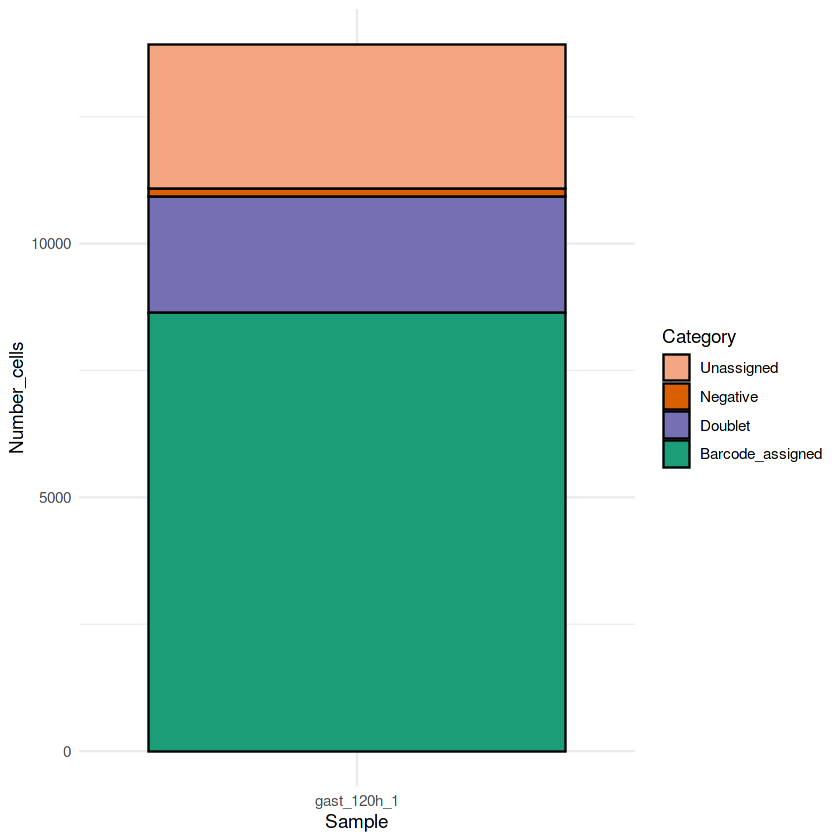

In [66]:
# Stacked
ggplot(x, aes(fill=Category, y=Number_cells, x=Sample)) + 
  geom_bar(position="stack", stat="identity", colour="black") +
  scale_fill_manual(values=c("#f4a582", "#d95f02", "#7570b3", "#1b9e77")) + 
  theme_minimal()

## Saving the files

In [67]:
# Save files
## 
saveRDS(barcode_assignment_120h_1, file = "./files/demultiplexing/barcode_assignment_120h_1.rds")
saveRDS(multiseq_assignment_120h_1, file = "./files/demultiplexing/multiseq_assignment_120h_1.rds")